In [1]:
from qiskit import QuantumCircuit as QC, transpile, Aer, IBMQ
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq

https://quantumcomputing.stackexchange.com/questions/15861/how-to-fix-an-error-qiskitbackendnotfounderror-no-backend-matches-the-crit

* **LOCAL**

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

* **CLOUD**

In [3]:
# IBMQ.save_account('aa1ce526bb38e08e1a5300e01ed10e9e9477978b5cb303289a1c41d0b02dfd6c038f11474ad3e980274c1a26df974e72513352fceb1e9fe5a5cd3d8850f7fe80', overwrite=True)

In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
provider = IBMQ.get_provider()

In [5]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
backend = provider.get_backend("ibm_osaka")

In [8]:
backend.configuration().to_dict()

{'backend_name': 'ibm_osaka',
 'backend_version': '1.0.7',
 'n_qubits': 127,
 'basis_gates': ['id', 'rz', 'sx', 'x', 'ecr', 'reset'],
 'gates': [{'name': 'id',
   'parameters': [],
   'qasm_def': 'gate id q { U(0, 0, 0) q; }',
   'coupling_map': [[0],
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7],
    [8],
    [9],
    [10],
    [11],
    [12],
    [13],
    [14],
    [15],
    [16],
    [17],
    [18],
    [19],
    [20],
    [21],
    [22],
    [23],
    [24],
    [25],
    [26],
    [27],
    [28],
    [29],
    [30],
    [31],
    [32],
    [33],
    [34],
    [35],
    [36],
    [37],
    [38],
    [39],
    [40],
    [41],
    [42],
    [43],
    [44],
    [45],
    [46],
    [47],
    [48],
    [49],
    [50],
    [51],
    [52],
    [53],
    [54],
    [55],
    [56],
    [57],
    [58],
    [59],
    [60],
    [61],
    [62],
    [63],
    [64],
    [65],
    [66],
    [67],
    [68],
    [69],
    [70],
    [71],
    [72],
    [73],
    [74],
    [75],
    [76

### qiskit.QuantumCircuit
- Usage: The instructions of the quantum system. It holds all your quantum operations.
- QC(2) --> a Quantum Circuit with 2 qubits
- QC(2, 2) --> a Quantum Circuit with 2 qubits and 2 classical bits

In [9]:
# Bell state circuit
circuit = QC(2, 2)

In [10]:
circuit.h(0) # a Hadamard gate on qubit 0, which puts it into a SUPERPOSITION state
circuit.cx(0, 1) # a controlled-Not operation (CNOT) on control qubit 0 and target qubit 1, putting the qubits in an ENTANGLEMENT state.
circuit.measure([0,1], [0,1]) # map the quantum measurement to the classical bits

In [12]:
# use Aer's qasm_simulator
simulator = QasmSimulator()

In [13]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

In [14]:
# execute the circuit on the QASM simulator
# QASM (Quantum Assembly Language) = the main Qiskit Aer backend
job = simulator.run(compiled_circuit, shots=100)
result = job.result()

In [15]:
# returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are: {}".format(counts))


Total count for 00 and 11 are: {'00': 55, '11': 45}


In [16]:
# draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

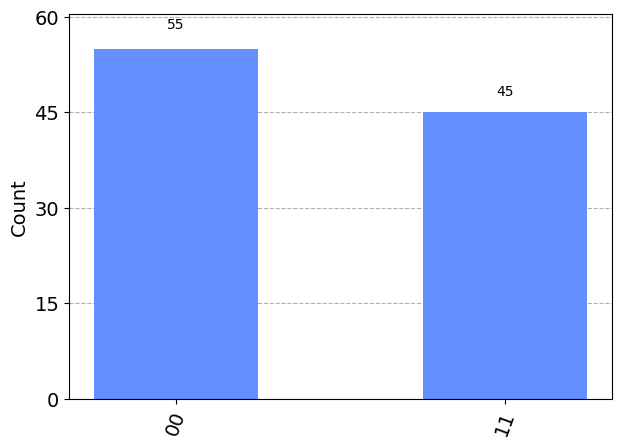

In [17]:
plot_histogram(counts)

If qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, 
- Qiskit would represent this state as $|100\rangle$, 
- whereas many physics textbooks would represent it as $|001\rangle$.

This difference in labeling affects the way multi-qubit operations are represented as matrices.
<br>For example, Qiskit represents a controlled-X ($C_{X}$) operation with qubit 0 being the **control** and qubit 1 being the **target** as

$$C_X = \begin{pmatrix} 1 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\\end{pmatrix}.$$

https://qiskit.org/textbook/ch-states/single-qubit-gates.html#1.2-The-Y-&-Z-gates--

### Multiple Qubits

In [18]:
from qiskit import assemble
from qiskit.quantum_info import Statevector as SV
from qiskit.visualization import array_to_latex as as_latex, plot_histogram, plot_bloch_multivector as pbm

In [19]:
from IPython.display import display

Notes when saving **statevectors**
- You can define `.save_statevector()` after every circuit creation. Run `QuantumCircuit.draw()` to see each statevector you've just created.
- If you need to PRINT OUT each statevector, use `qiskit.quantum_info.Statevector.from_instruction()` [(reference)](https://quantumcomputing.stackexchange.com/questions/20894/saving-statevector-on-more-than-one-location-in-a-quantum-circuit-in-qiskit).
- If you need to SAVE each statevector, give it a label, `QuantumCircuit.save_statevector(label=<YOUR_LABEL>)` [(reference)](https://quantumcomputing.stackexchange.com/questions/28267/get-statevector-not-working-with-qiskit-aers-statevector-simulator).

In [21]:
n_qubits = 3
mqc = QC(n_qubits)

initial_state = [0, 1] # define initial_state as |1>
mqc.initialize(initial_state, 0) # apply initialisation operation to the 0th qubit
mqc.save_statevector(label="init")

for qubit in range(n_qubits): # apply Hadamard gate to each circuit
    mqc.h(qubit)

mqc.draw()

┌─────────────────┐ init ┌───┐
q_0: ┤ Initialize(0,1) ├──░───┤ H ├
     └─────────────────┘  ░   ├───┤
q_1: ─────────────────────░───┤ H ├
                          ░   ├───┤
q_2: ─────────────────────░───┤ H ├
                          ░   └───┘

* It is encouraged to name **label="statevector"** in the final step (so `.get_statevector()` and `.get_counts()` will naturally work)

In [22]:
statevector_simulator = Aer.get_backend('aer_simulator_statevector')
mqc.save_statevector(label="statevector") # tell simulator to save statevector

qobj = assemble(mqc) # create a quantum object (Qobj) from the circuit for the simulator to run
result = statevector_simulator.run(qobj).result()

# TO DIRECTLY CALL STATEVECTOR
# final_state = result.get_statevector(experiment=mqc)
# display(as_latex(final_state, prefix="\\text{Statevector} = "))

for sv_label, stateVect in result.data().items():
    print("label: {}".format(sv_label))
    display(stateVect.draw(output="latex", prefix="\\text{Statevector} = "))
    print("")
final_state = stateVect

label: statevector


<IPython.core.display.Latex object>


label: init


<IPython.core.display.Latex object>

In [23]:
mqc.draw()

┌─────────────────┐ init ┌───┐ statevector 
q_0: ┤ Initialize(0,1) ├──░───┤ H ├──────░──────
     └─────────────────┘  ░   ├───┤      ░      
q_1: ─────────────────────░───┤ H ├──────░──────
                          ░   ├───┤      ░      
q_2: ─────────────────────░───┤ H ├──────░──────
                          ░   └───┘      ░

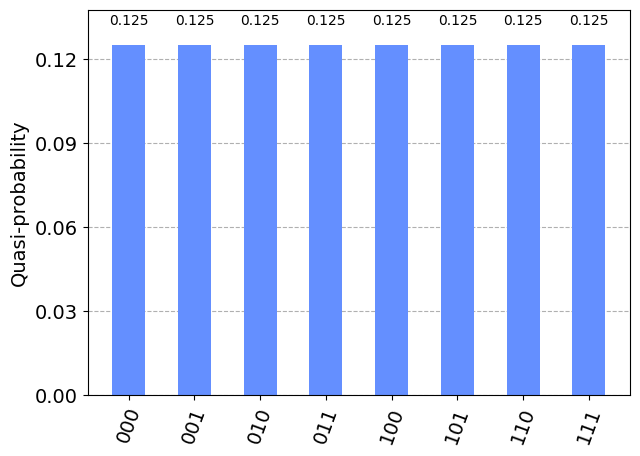

In [24]:
plot_histogram(result.get_counts(experiment=mqc))

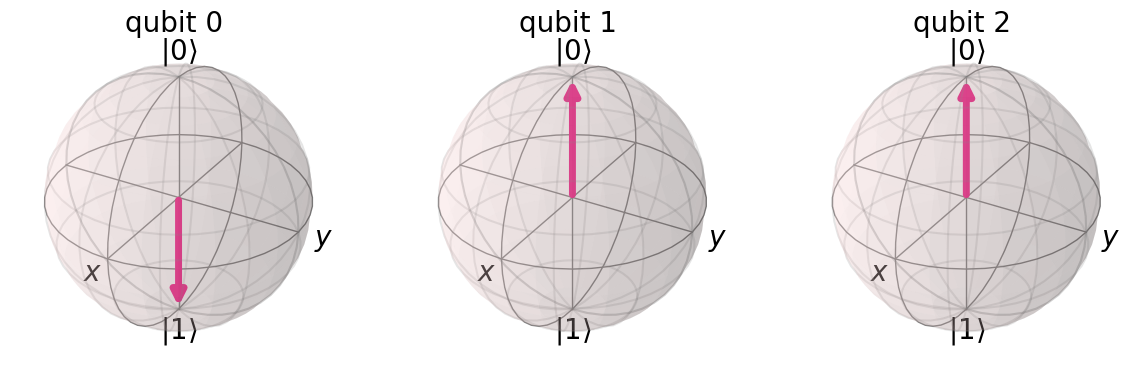

In [25]:
pbm(final_state)